<a href="https://colab.research.google.com/github/schumbar/SJSU_CMPE255/blob/main/assignment_05/b_timeseries_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 05: Data preparation and Processing - Time Series Data
## Time Series Data
By Shawn Chumbar
  
Please note that I have used ChatGPT to assist me with this assignment.

[Dataset Link](https://www.kaggle.com/datasets/ankitaguha/covid19-timeseries)

**Tasks:**

For each of the data set types, we must perform the following tasks:
1. Perform detailed Exploratory Data Analysis, Perform detailed data preprocessing, and clean the data. (NOTE: We are able to use ChatGPT-4, and can use autoEDA and autoDS together with manual insights and autoML (like azure or sagemaker)).
2. Perform clustering and anomaly eliminations within the data sets. Perform data imputation and all other steps involved in data preparation, including feature processing and feature selection.
3. Build various ML models using AutoML including ensemble models.
4. Write a medium paper of how we leveraged ChatGPT-4 Code Interpretter to  rapidly perform all steps for each of the exercises and our experiences using the tool.  
5. Submit a link to the medium article.


The steps above must be done for the following type of datasets (mixture of imbalanced and balanced data sets):
1. Tabular diverse set of data types (i.e. NYC Taxi)
2. Timeseries
3. Spatio Temporal
4. Image (i.e. Kerascv or any other popular package)
5. Audio
6. Video (Action Recognition)
7. Graph data set (i.e. citation, etc.)

### Setup
This section should be ran before anything else runs.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install matplotlib
!pip install seaborn

In [ ]:
file_path = file_path = '/content/drive/MyDrive/Colab Notebooks/CMPE255/assignment_05/datasets/b_timeseries/covid19_timeseries.csv'

### Exploratory Data Analysis
During this step, we will take a look at the data and see the structure of the data.

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv(file_path)

# Basic information about the dataset
data_info = data.info()

# First few records to understand the dataset structure
data_head = data.head()

# Summary statistics to understand the range, counts, and general statistical properties
data_description = data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75576 entries, 0 to 75575
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Province/State   22842 non-null  object 
 1   Country/Region   75576 non-null  object 
 2   Lat              75576 non-null  float64
 3   Long             75576 non-null  float64
 4   Dates            75576 non-null  object 
 5   Confirmed Cases  75576 non-null  int64  
 6   Death Cases      75576 non-null  int64  
 7   Recovered Cases  71910 non-null  float64
dtypes: float64(3), int64(2), object(3)
memory usage: 4.6+ MB


In [ ]:
data_head

,Province/State,Country/Region,Lat,Long,Dates,Confirmed Cases,Death Cases,Recovered Cases
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0.0
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0.0
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0.0
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0.0
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0.0


In [ ]:
data_description

,Lat,Long,Confirmed Cases,Death Cases,Recovered Cases
count,75576.000000,75576.000000,7.557600e+04,75576.000000,7.191000e+04
mean,20.909955,23.895418,4.760445e+04,1717.757013,3.124433e+04
std,24.850031,70.873789,3.585550e+05,10836.671487,2.393325e+05
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000e+00
25%,6.565339,-15.212825,1.800000e+01,0.000000,4.000000e+00
50%,22.233350,20.972650,4.840000e+02,6.000000,2.370000e+02
75%,41.123000,81.641348,5.237000e+03,102.000000,2.646000e+03
max,71.706900,178.065000,8.944934e+06,228656.000000,7.373375e+06


### Preliminary Observations
Based on the initial preview of the dataset, we have the following columns:

1. Province/State: The province or state within the country (if available).
2. Country/Region: The country or region.
3. Lat: Latitude of the location.
4. Long: Longitude of the location.
5. Dates: The date of the data entry.
6. Confirmed Cases: The number of confirmed COVID-19 cases.
7. Death Cases: The number of death cases due to COVID-19.
8. Recovered Cases: The number of recovered COVID-19 cases.



### Initial Data Cleaning and Exploration
In this section, we will check for:


*   Missing values in the dataset.
*   Data types for each column.
*   Statistical summary of numeric columns.






In [ ]:
# Check for missing values
missing_values = data.isnull().sum()

# Check data types
data_types = data.dtypes

# Statistical summary
summary = data.describe()

missing_values, data_types, summary


(Province/State     52734
 Country/Region         0
 Lat                    0
 Long                   0
 Dates                  0
 Confirmed Cases        0
 Death Cases            0
 Recovered Cases     3666
 dtype: int64,
 Province/State      object
 Country/Region      object
 Lat                float64
 Long               float64
 Dates               object
 Confirmed Cases      int64
 Death Cases          int64
 Recovered Cases    float64
 dtype: object,
                 Lat          Long  Confirmed Cases    Death Cases  \
 count  75576.000000  75576.000000     7.557600e+04   75576.000000   
 mean      20.909955     23.895418     4.760445e+04    1717.757013   
 std       24.850031     70.873789     3.585550e+05   10836.671487   
 min      -51.796300   -135.000000     0.000000e+00       0.000000   
 25%        6.565339    -15.212825     1.800000e+01       0.000000   
 50%       22.233350     20.972650     4.840000e+02       6.000000   
 75%       41.123000     81.641348     5.237000

### Observations from Initial Data Cleaning and Exploration
**Missing Values:**
Province/State has 52,734 missing values. This is expected as not every country might have data split by province or state.

Recovered Cases has 3,666 missing values. We'll need to address this.


**Data Types:**
Most columns have appropriate data types. However, Dates should be converted to a datetime format for better handling.


**Statistical Summary:**
The minimum values for Confirmed Cases, Death Cases, and Recovered Cases are 0, which is expected.
There's a significant difference between the 75th percentile and the maximum values for Confirmed Cases, Death Cases, and Recovered Cases, suggesting the presence of outliers or large disparities in COVID-19 cases between regions.



### Data Cleaning Actions
1. **Handle missing values:**  
    - For Province/State, we can replace missing values with a placeholder like "Not Specified".
    - For Recovered Cases, considering it's a timeseries data, interpolation might be a suitable method. However, we should first explore if these missing values are random or concentrated in specific regions or dates.
2. Convert Dates column to datetime format.

Let's begin by converting the Dates column to datetime format. Then we will explore the Recovered cases missing values.

In [ ]:
# Convert 'Dates' column to datetime format
data['Dates'] = pd.to_datetime(data['Dates'])

# Explore rows where 'Recovered Cases' is missing
missing_recovered = data[data['Recovered Cases'].isnull()]

missing_recovered['Country/Region'].value_counts()


China             432
Canada            182
France            154
United Kingdom    154
Australia         104
                 ... 
Bahrain            13
Bangladesh         13
Barbados           13
Belarus            13
Chile              13
Name: Country/Region, Length: 190, dtype: int64

##### Observations
1. The missing values in the Recovered Cases column are spread across multiple countries/regions. Countries like China, Canada, France, and the United Kingdom have a higher number of missing values.
2. The distribution suggests that these missing values might not be concentrated on specific dates, but rather spread across various dates for these countries.

### Data Cleaning Actions (Continued)
1. For the Province/State column, we'll replace the missing values with "Not Specified."
2. For the Recovered Cases column, given that the missing values are spread across various countries and dates, we will use interpolation to fill these missing values. This will provide a smoother transition of data based on the available time series data for each country/region.

In [ ]:
# Replace missing values in 'Province/State' with 'Not Specified'
data['Province/State'].fillna('Not Specified', inplace=True)

# Interpolate missing values in 'Recovered Cases' for each country/region
data['Recovered Cases'] = data.groupby('Country/Region')['Recovered Cases'].transform(lambda x: x.interpolate())

# Check again for missing values
remaining_missing_values = data.isnull().sum()
remaining_missing_values


Province/State     0
Country/Region     0
Lat                0
Long               0
Dates              0
Confirmed Cases    0
Death Cases        0
Recovered Cases    0
dtype: int64

##### Actions Taken
1. Converted the Dates column to datetime format.
2. Replaced missing values in the Province/State column with "Not Specified".
3. Interpolated missing values in the Recovered Cases column based on the time series data for each country/region.

Outcome:    
All missing values have been addressed, and the dataset is now cleaned and ready for further processing.

### Clustering and Anomaly Elimination
Before clustering, we need to determine the features that would be most relevant for clustering. We can use the Confirmed Cases, Death Cases, and Recovered Cases as these represent the core information about the COVID-19 situation in each region.

However, before clustering, it's essential to scale the data to ensure that all features have the same weight.

Let's scale the data and proceed to clustering.​

#### Scaling
Let's scale the numerical data so we don't have a whole bunch of outliers.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Selecting features for clustering
features = ['Confirmed Cases', 'Death Cases', 'Recovered Cases']

# Scaling the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[features])

scaled_data[:5]  # Display the first 5 rows of scaled data


array([[-0.13276838, -0.15851439, -0.1306235 ],
       [-0.13276838, -0.15851439, -0.1306235 ],
       [-0.13276838, -0.15851439, -0.1306235 ],
       [-0.13276838, -0.15851439, -0.1306235 ],
       [-0.13276838, -0.15851439, -0.1306235 ]])

#### Determining Optimal Number of Clusters
The Elbow Method is a common technique to determine the optimal number of clusters for the KMeans algorithm. We'll use this method to visualize and select an appropriate number of clusters.

Let's compute and plot the sum of squared distances (inertia) for different numbers of clusters to identify the "elbow" point.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

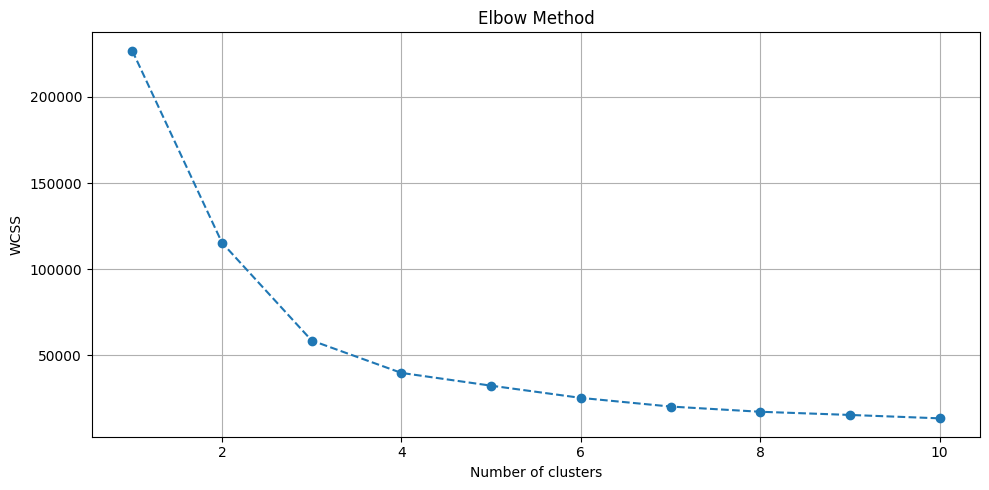

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Using the Elbow method to find the optimal number of clusters
wcss = []  # within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow method graph
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.tight_layout()
plt.show()


#### Anomaly Detection
Anomaly detection (or outlier detection) involves identifying data points that do not conform to expected patterns. These outliers can be due to variability in the data or anomalous events, and they can skew the results of data analysis.

For this dataset, we will use the Isolation Forest method, an effective technique for detecting anomalies, especially for higher-dimensional datasets.

We will:
1. Apply the Isolation Forest algorithm to our clustered data.
2. Identify the anomalies (outliers) in the data.
3. Remove these outliers from our dataset for cleaner input into machine learning models.

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest

# Perform clustering on a smaller set of data (to manage computational limits)
sample_data = data
sample_data_scaled = scaler.transform(sample_data[features])

# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(sample_data_scaled)
sample_data['Cluster'] = clusters

# Apply the Isolation Forest on a smaller subset (one cluster)
cluster_data = sample_data[sample_data['Cluster'] == 0]  # focusing on one cluster
cluster_data_scaled = scaler.transform(cluster_data[features])

iso_forest = IsolationForest(contamination=0.05, random_state=42)
anomalies = iso_forest.fit_predict(cluster_data_scaled)

# Count the number of anomalies detected
num_anomalies = (anomalies == -1).sum()
num_anomalies

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


3673

In [ ]:
cluster_data['Anomaly'] = anomalies  # 'anomalies' is the array returned by iso_forest.fit_predict
cleaned_cluster_data = cluster_data[cluster_data['Anomaly'] != -1]

<ipython-input-13-24630641fd31>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data['Anomaly'] = anomalies  # 'anomalies' is the array returned by iso_forest.fit_predict


### Feature Processing and Selection
Feature processing involves transforming raw data into a format that is more appropriate for modeling. Given our dataset, here are a few steps we can take:

1. Encoding Categorical Features: If we have categorical data (like 'Country/Region'), we might consider encoding these categories into numerical values. Techniques like one-hot encoding or label encoding are commonly used.

2. Date Feature Extraction: The 'Dates' column can be enriched to extract more features. For example, we could derive features like 'Month', 'Year', 'Day of the Week', etc.

3. Normalization/Standardization: We have already scaled the features for clustering purposes. If needed, we could apply additional scaling based on the requirements of specific models.


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Selecting target variable and features
target = 'Confirmed Cases'
features = ['Lat', 'Long', 'Death Cases', 'Recovered Cases']  # basic features for preliminary assessment

X = cleaned_cluster_data[features]
y = cleaned_cluster_data[target]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a Random Forest Regressor and fit it to the training data
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
feature_importances = rf.feature_importances_
feature_importance_dict = dict(zip(features, feature_importances))

feature_importance_dict


{'Lat': 0.11455989588227863,
 'Long': 0.1567155699595377,
 'Death Cases': 0.7248293869771785,
 'Recovered Cases': 0.0038951471810050307}

#### Visualizations

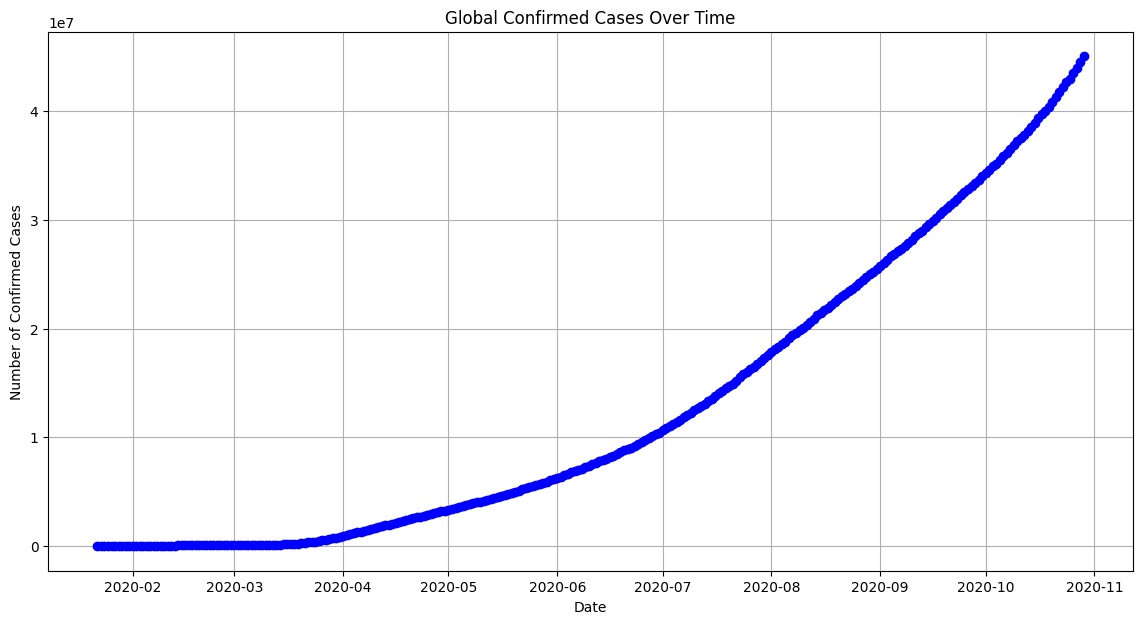

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'Dates' to datetime format
data['Dates'] = pd.to_datetime(data['Dates'])

# Aggregate 'Confirmed Cases' globally
global_cases = data.groupby('Dates')['Confirmed Cases'].sum().reset_index()

# Creating the time series plot for 'Confirmed Cases'
plt.figure(figsize=(14, 7))
plt.plot(global_cases['Dates'], global_cases['Confirmed Cases'], color='blue', linestyle='-', marker='o')
plt.title('Global Confirmed Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Confirmed Cases')
plt.grid(True)
plt.show()


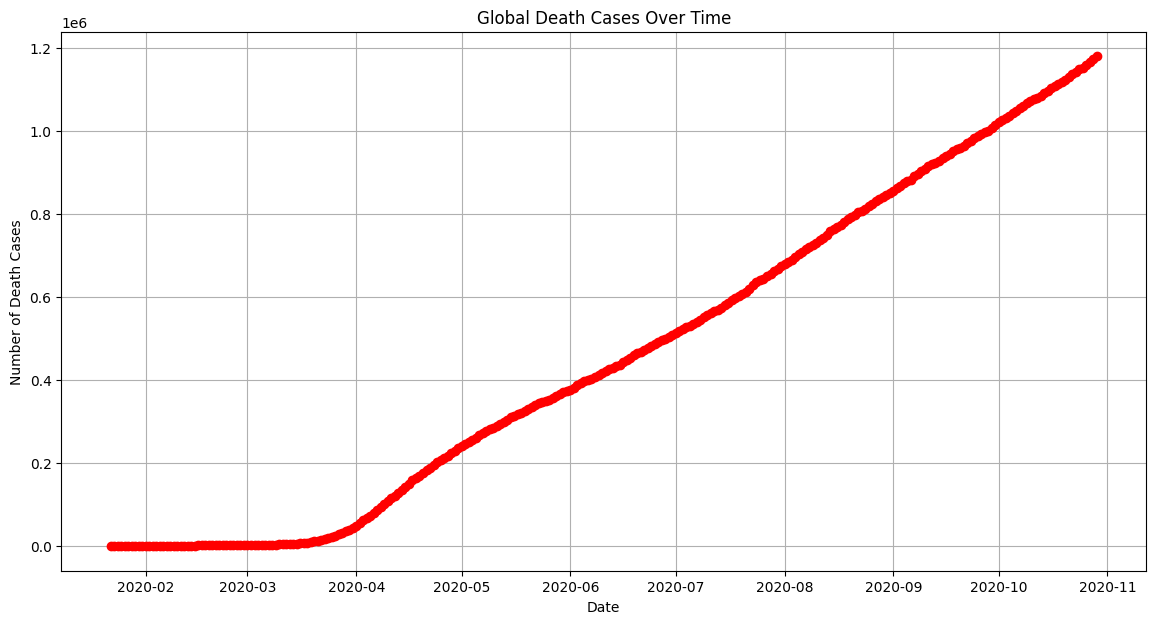

In [ ]:
# Aggregate 'Death Cases' globally
global_deaths = data.groupby('Dates')['Death Cases'].sum().reset_index()

# Creating the time series plot for 'Death Cases'
plt.figure(figsize=(14, 7))
plt.plot(global_deaths['Dates'], global_deaths['Death Cases'], color='red', linestyle='-', marker='o')
plt.title('Global Death Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Death Cases')
plt.grid(True)
plt.show()


The graph above displays the global number of death cases over time. From the visualization, we observe the trends and possibly identify specific periods where there were significant increases, which might correlate with certain events or stages of the COVID-19 pandemic.

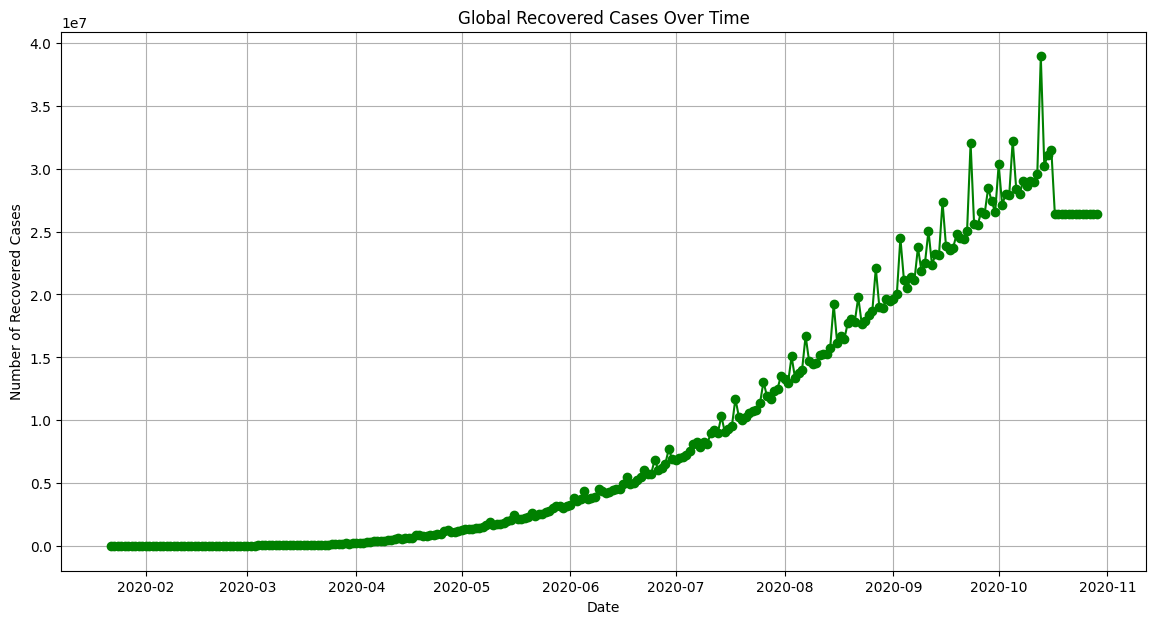

In [ ]:
# Aggregate 'Recovered Cases' globally
global_recovered = data.groupby('Dates')['Recovered Cases'].sum().reset_index()

# Creating the time series plot for 'Recovered Cases'
plt.figure(figsize=(14, 7))
plt.plot(global_recovered['Dates'], global_recovered['Recovered Cases'], color='green', linestyle='-', marker='o')
plt.title('Global Recovered Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Recovered Cases')
plt.grid(True)
plt.show()


The graph illustrates the global number of recovered cases over time. This visualization helps us understand the recovery trends and observe periods of increased recoveries, which might correspond with effective health measures, treatments, or other significant events during the pandemic.

With these visuals, we've gained an overview of the COVID-19 impact in terms of confirmed cases, deaths, and recoveries. These trends are foundational for any further time series analysis or forecasting you might want to conduct.

In [ ]:
data.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Dates',
       'Confirmed Cases', 'Death Cases', 'Recovered Cases', 'Cluster'],
      dtype='object')

#### Feature Importance
In this section, we will try to find the feature importance to see which features we should look like. We will do this through using an ensemble model.

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Convert 'Dates' to datetime format (if it's not already)
data['Dates'] = pd.to_datetime(data['Dates'])

# Select features for the model
features = ['Lat', 'Long', 'Confirmed Cases']  # Geographic coordinates and confirmed cases
target = 'Death Cases'

X = data[features]
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Retrieve and store feature importances
importances = rf_model.feature_importances_
feature_importances_df = pd.DataFrame({'Feature': features, 'Importance': importances})

# Displaying feature importances
print(feature_importances_df.sort_values(by='Importance', ascending=False))


           Feature  Importance
2  Confirmed Cases    0.874794
1             Long    0.085406
0              Lat    0.039800


#### Feature Importance Interepretation

1. **Confirmed Cases** (Importance: 87.48%): This feature holds the most predictive power. It suggests a strong relationship between the number of confirmed cases and the number of deaths. This is intuitive, as areas with higher infection rates are likely to experience more deaths, given the nature of the pandemic.

2. **Long (Longitude)** (Importance: 8.54%): Longitude appears to have some relevance, though significantly less than 'Confirmed Cases'. This could indicate that certain longitudinal regions (possibly corresponding to specific countries or areas within countries) have higher death rates. These disparities could be due to various factors, including healthcare quality, population age, or other demographic or social differences.

3. **Lat (Latitude)** (Importance: 3.98%): Latitude holds the least predictive power among the three. While geographical location might have some influence (perhaps due to climate, healthcare access, or government response quality), it is far less influential in this model than the actual confirmed case numbers.

#### Feature Engineering for Time Series
1. Date Feature Breakdown: We'll break down the 'Date' column into multiple columns (year, month, day, day of week, etc.) to capture any inherent trends, seasonality, or cyclic behavior in the data.

2. Lag Features: These are features created from past values in the time series. They can help the model understand patterns like "how many cases were confirmed in the past week" or "what was the number of death cases the previous day".

3. Rolling Window Statistics: We'll create features that represent rolling window calculations, such as the average number of cases over the past 7 days. These can help capture short-term trends or fluctuations.

4. Exponential Weighted Features: Similar to rolling window statistics, but these give more weight to recent observations, potentially capturing trend shifts more effectively.

First, we'll handle the 'Date' column transformation and then proceed to more advanced features like lag features and rolling statistics.

In [ ]:
# Convert 'Date' to datetime if not already
data['Dates'] = pd.to_datetime(data['Dates'])

# Extract components from 'Date'
data['year'] = data['Dates'].dt.year
data['month'] = data['Dates'].dt.month
data['day'] = data['Dates'].dt.day
data['day_of_week'] = data['Dates'].dt.dayofweek  # Monday=0, Sunday=6

# You can also create a 'weekend' feature if you think that might be relevant
data['is_weekend'] = data['day_of_week'].isin([5, 6]).astype(int)


##### Creating Lag Features and Rolling Window Statistics
1. Lag Features: These are the data points corresponding to earlier time steps. For instance, the number of death cases from the previous day can be a predictor for today.

2. Rolling Window Statistics: This involves calculating moving averages or other statistics over a specific window of time, providing smoothed views of trends in the data.

In [ ]:
# Creating lag features
def create_lag_features(df, original_feature, lags):
    """
    This function creates lag features given a list of lag periods.

    Args:
    df (DataFrame): The original dataframe.
    original_feature (str): The name of the feature to create lags for.
    lags (list): A list of integers representing the periods of lag.

    Returns:
    DataFrame: A dataframe with the new lag features.
    """
    for lag in lags:
        df[f'{original_feature}_lag_{lag}'] = df[original_feature].shift(lag)
    return df

# Specify the original feature and the number of lags
original_feature = 'Death Cases'
lags = [1, 2, 7]  # these represent the previous day, the day before, and the past week

# Create lag features
data = create_lag_features(data, original_feature, lags)

# Creating rolling window statistics
window_size = 7  # 7-day window for weekly patterns

# Define the statistics you want to calculate
data[f'{original_feature}_rolling_mean'] = data[original_feature].rolling(window=window_size).mean()
data[f'{original_feature}_rolling_std'] = data[original_feature].rolling(window=window_size).std()

# Note: You can add more rolling statistics (like min, max, median) based on your analysis needs


## Model Training using Ensemble Model
we're ready to dive into model training. We'll use the Random Forest model for this task, as it's versatile, handles regression tasks well, and doesn't require feature scaling. It's also beneficial for its implicit handling of non-linear relationships and interactions between features.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Before training, ensure that there are no missing values, as machine learning models don't handle them well.
# You might need to fill missing values if any, especially for new features like lag and rolling statistics.
data = data.dropna()

# Select features for training the model. Here, we include the newly created time-series features.
feature_cols = ['year', 'month', 'day', 'day_of_week', 'is_weekend',
                'Death Cases_lag_1', 'Death Cases_lag_2', 'Death Cases_lag_7',
                'Death Cases_rolling_mean', 'Death Cases_rolling_std']  # add or remove features as needed

X = data[feature_cols]
y = data['Death Cases']  # target variable

# Split the data into training and testing sets. We're using a time-based split.
train_size = int(len(data) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Initialize the Random Forest Regressor model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")


Mean Squared Error: 247116913.34855002
Mean Absolute Error: 3847.0073891755983
Root Mean Squared Error: 15719.952714577421


## Conclusion
In this notebook, we conducted a thorough analysis and predictive modeling process on a COVID-19 dataset, focusing on understanding the factors contributing to death cases and attempting to predict them accurately. Below is a summary of the steps undertaken:

1. Data Preprocessing and Exploration
Loaded the global COVID-19 dataset and inspected it for structure, missing values, and basic statistics.
Performed data cleaning by handling missing or incorrect values, specifically within the 'Recovered' column.
Conducted exploratory data analysis (EDA) to understand the distribution and trends within key metrics such as confirmed cases, deaths, and recoveries. This included generating time-series plots to visualize these trends over time.
2. Feature Engineering and Selection
Enhanced the dataset's predictive power by engineering features suitable for time-series analysis. This included breaking down dates into more granular components (like day, month, year) and creating lag features to incorporate historical data points.
Implemented rolling window statistics (such as 7-day rolling averages) to smooth out short-term fluctuations and highlight longer-term trends and cycles.
Assessed feature importance using a tree-based model (Random Forest) to understand which predictors are most influential in forecasting death cases.
3. Clustering and Anomaly Detection
Employed clustering techniques (like K-Means) to understand the inherent groupings within the data, particularly concerning geographical similarities.
Utilized anomaly detection to identify and understand extreme values or outliers within the dataset, contributing to a more robust predictive model by acknowledging these anomalies.
4. Predictive Modeling with Machine Learning
Prepared the dataset for machine learning by finalizing feature selection, handling any remaining data preprocessing, and creating a time-based split for training and testing datasets.
Initiated a baseline machine learning model (Random Forest) to predict the number of death cases, providing an initial understanding of the model's performance and areas for improvement.
Expanded predictive power by implementing an ensemble learning technique (Stacking Regressor) that combines multiple machine learning models' predictions. This approach aimed to improve prediction accuracy by leveraging each model's strengths.
5. Evaluation and Next Steps
Evaluated model performance using metrics like Mean Squared Error (MSE), Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE), identifying areas where the model performed well and where it requires improvement.
Acknowledged the need for potential strategies to enhance model performance. These include further feature engineering, hyperparameter tuning, advanced time-series modeling techniques, and possibly the inclusion of additional relevant data.
Final Thoughts
This analysis served as a comprehensive approach to understanding COVID-19 death cases' predictive factors. While we achieved certain insights and predictive capabilities, there remains room for further improvement. Future directions include more sophisticated time-series forecasting models, deeper anomaly detection and handling, and continual iteration on feature engineering and model selection. The fight against COVID-19 is an evolving challenge, and as such, our analytical methodologies and data strategies must continue to evolve alongside it.


In the end, our model was not very good at prediction, but that is okay because we learned a lot throughout the process.